In [2]:
from qiskit import *
import random
from qiskit.visualization import plot_histogram

In [3]:
n = 5
b = ''

q = QuantumRegister(n+1)
c = ClassicalRegister(n+1)
qc = QuantumCircuit(q, c)

for i in range(0, n):
    b += str(random.randint(0, 1))

qc.x(q[n])
qc.h(q)

qc.barrier()
#Apply Oracle (f(x) XOR qc[n])
for i in range(0, len(b)):
    if b[i] == '1':
        qc.cx(q[i], q[n])
qc.barrier()
        
qc.h(q)
qc.barrier()
qc.measure(q, c)
qc.draw()

┌───┐      ░                 ░ ┌───┐ ░ ┌─┐               
q0_0: ┤ H ├──────░─────────────────░─┤ H ├─░─┤M├───────────────
      ├───┤      ░                 ░ ├───┤ ░ └╥┘┌─┐            
q0_1: ┤ H ├──────░───■─────────────░─┤ H ├─░──╫─┤M├────────────
      ├───┤      ░   │             ░ ├───┤ ░  ║ └╥┘┌─┐         
q0_2: ┤ H ├──────░───┼─────────────░─┤ H ├─░──╫──╫─┤M├─────────
      ├───┤      ░   │             ░ ├───┤ ░  ║  ║ └╥┘┌─┐      
q0_3: ┤ H ├──────░───┼────■────────░─┤ H ├─░──╫──╫──╫─┤M├──────
      ├───┤      ░   │    │        ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐   
q0_4: ┤ H ├──────░───┼────┼────■───░─┤ H ├─░──╫──╫──╫──╫─┤M├───
      ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐
q0_5: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├
      └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░  ║  ║  ║  ║  ║ └╥┘
c0_0: ════════════════════════════════════════╩══╬══╬══╬══╬══╬═
                                                 ║  ║  ║  ║  ║ 
c0_1: ═══════════════════════════════════════════╩══╬══╬══╬══╬═
                                                    ║  ║  ║  ║ 
c0_2: ══════════════════════════════════════════════╩══╬══╬══╬═
                                                       ║  ║  ║ 
c0_3: ═════════════════════════════════════════════════╩══╬══╬═
                                                          ║  ║ 
c0_4: ════════════════════════════════════════════════════╩══╬═
                                                             ║ 
c0_5: ═══════════════════════════════════════════════════════╩═

01011


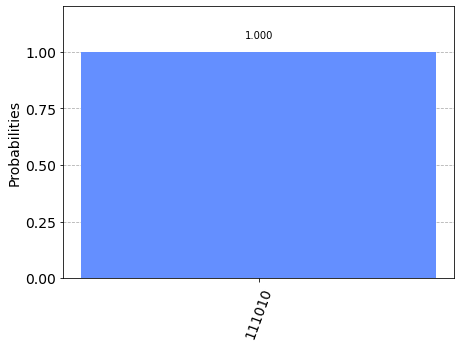

In [4]:
print(b)
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts()
plot_histogram(counts)